<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M15_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from google.colab import files
import io

In [2]:
uploaded = files.upload()
file_name = next(iter(uploaded))


df = pd.read_csv(file_name, delimiter=';')

Saving CHURN_TELECON_MOD08_TAREFA.csv to CHURN_TELECON_MOD08_TAREFA (4).csv


In [3]:
dtype_mapping = {
    'customerID': 'object',
    'Genero': 'category',
    'Idoso': 'int64',
    'Casado': 'category',
    'Dependents': 'category',
    'Tempo_como_Cliente': 'int64',
    'PhoneService': 'category',
    'Servico_Internet': 'category',
    'Servico_Seguranca': 'category',
    'Suporte_Tecnico': 'category',
    'StreamingTV': 'category',
    'Tipo_Contrato': 'category',
    'PaymentMethod': 'category',
    'Pagamento_Mensal': 'float64',
    'Total_Pago': 'float64',
    'Churn': 'category'
}

In [4]:
try:
    df['Total_Pago'] = pd.to_numeric(df['Total_Pago'], errors='coerce')
    df = df.astype(dtype_mapping)
    print("\nTipos de dados após a conversão:")
    print(df.info())

    print("\nTransformação concluída com sucesso.")
except Exception as e:
    print(f"\nOcorreu um erro durante a transformação: {e}")


Tipos de dados após a conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          2500 non-null   object  
 1   Genero              2488 non-null   category
 2   Idoso               2500 non-null   int64   
 3   Casado              2500 non-null   category
 4   Dependents          2500 non-null   category
 5   Tempo_como_Cliente  2500 non-null   int64   
 6   PhoneService        1018 non-null   category
 7   Servico_Internet    2500 non-null   category
 8   Servico_Seguranca   2500 non-null   category
 9   Suporte_Tecnico     2500 non-null   category
 10  StreamingTV         2500 non-null   category
 11  Tipo_Contrato       2500 non-null   category
 12  PaymentMethod       2500 non-null   category
 13  Pagamento_Mensal    2175 non-null   float64 
 14  Total_Pago          2500 non-null   float64 
 15  Chur

In [5]:
print("Porcentagem de dados faltantes por coluna antes da limpeza:")
missing_data_initial = df.isnull().sum()
total_rows_initial = len(df)
percentage_missing_initial = (missing_data_initial / total_rows_initial) * 100
print(percentage_missing_initial.sort_values(ascending=False))
print("-" * 50)

Porcentagem de dados faltantes por coluna antes da limpeza:
PhoneService          59.28
Pagamento_Mensal      13.00
Genero                 0.48
Churn                  0.20
Casado                 0.00
Dependents             0.00
Idoso                  0.00
customerID             0.00
Servico_Internet       0.00
Tempo_como_Cliente     0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
Tipo_Contrato          0.00
StreamingTV            0.00
PaymentMethod          0.00
Total_Pago             0.00
dtype: float64
--------------------------------------------------


In [6]:
df_cleaned = df.dropna(subset=['Genero', 'Churn'])

# Exibindo os resultados da limpeza
print("\nDataFrame após a exclusão de linhas com dados faltantes nas colunas selecionadas:")
print(f"Número de linhas original: {total_rows_initial}")
print(f"Número de linhas após a remoção: {len(df_cleaned)}")
print("-" * 50)


DataFrame após a exclusão de linhas com dados faltantes nas colunas selecionadas:
Número de linhas original: 2500
Número de linhas após a remoção: 2488
--------------------------------------------------


In [7]:
print("Porcentagem de dados faltantes por coluna após a limpeza:")
missing_data_final = df_cleaned.isnull().sum()
total_rows_final = len(df_cleaned)
percentage_missing_final = (missing_data_final / total_rows_final) * 100
print(percentage_missing_final.sort_values(ascending=False))

Porcentagem de dados faltantes por coluna após a limpeza:
PhoneService          59.565916
Pagamento_Mensal      12.580386
Idoso                  0.000000
customerID             0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
Genero                 0.000000
Servico_Internet       0.000000
Servico_Seguranca      0.000000
StreamingTV            0.000000
Suporte_Tecnico        0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Total_Pago             0.000000
Churn                  0.000000
dtype: float64


In [13]:
print("Removendo a coluna 'PhoneService'...")
df_cleaned = df_cleaned.drop('PhoneService', axis=1)

Removendo a coluna 'PhoneService'...


In [18]:
df_cleaned.head(10)


,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
16,8191-XWSZG,F,0,No,No,52,No,No internet service,No internet service,No internet service,One year,Mailed check,NaN,1022.95,No
17,9959-WOFKT,Male,0,No,Yes,71,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),NaN,7382.25,No
18,4190-MFLUW,F,0,Yes,Yes,10,DSL,No,Yes,No,Month-to-month,Credit card (automatic),NaN,528.35,Yes
19,4183-MYFRB,F,0,No,No,21,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,1862.90,No
20,8779-QRDMV,Male,1,No,No,1,DSL,No,No,No,Month-to-month,Electronic check,NaN,39.65,Yes
21,1680-VDCWW,Male,0,Yes,No,12,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),NaN,202.25,No


In [19]:
median_pagamento = df_cleaned['Pagamento_Mensal'].median()
df_cleaned['Pagamento_Mensal'] = df_cleaned['Pagamento_Mensal'].fillna(median_pagamento)

In [20]:
df_cleaned.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,8191-XWSZG,F,0,No,No,52,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No
17,9959-WOFKT,Male,0,No,Yes,71,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
18,4190-MFLUW,F,0,Yes,Yes,10,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
19,4183-MYFRB,F,0,No,No,21,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
20,8779-QRDMV,Male,1,No,No,1,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
21,1680-VDCWW,Male,0,Yes,No,12,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,No


In [22]:
df_cleaned['Genero'] = df_cleaned['Genero'].replace({'M': 'Male', 'F': 'Female', 'f': 'Female'})

# Padronizando a coluna 'Servico_Internet'
# Padronizando a capitalização dos valores
df_cleaned['Servico_Internet'] = df_cleaned['Servico_Internet'].str.title()
# Corrigindo a grafia para a forma padrão 'DSL'
df_cleaned['Servico_Internet'] = df_cleaned['Servico_Internet'].replace('Dsl', 'DSL')

# Padronizando todas as outras colunas categóricas para evitar futuros problemas
for col in df.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.strip()
        df_cleaned[col] = df_cleaned[col].str.title()

/tmp/ipython-input-3829633112.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned['Genero'] = df_cleaned['Genero'].replace({'M': 'Male', 'F': 'Female', 'f': 'Female'})


In [27]:
df_cleaned.to_csv("ATIVIDADE 15.csv", index=False)

# Baixando o arquivo para sua máquina local
files.download("ATIVIDADE 15.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [32]:
df_cleaned.describe(include='all')

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
count,2488,2488,2488.000000,2488,2488,2488.000000,2488,2488,2488,2488,2488,2488,2488.000000,2488.000000,2488
unique,2488,2,NaN,2,2,NaN,3,3,3,3,3,4,NaN,NaN,2
top,6061-Gwwav,Male,NaN,No,No,NaN,Fiber Optic,No,No,No,Month-to-month,Electronic check,NaN,NaN,No
freq,1,1269,NaN,1262,1705,NaN,1119,1254,1250,1001,1369,830,NaN,NaN,1841
mean,NaN,NaN,0.161576,NaN,NaN,32.352090,NaN,NaN,NaN,NaN,NaN,NaN,66.342564,2290.087178,NaN
std,NaN,NaN,0.368135,NaN,NaN,24.636885,NaN,NaN,NaN,NaN,NaN,NaN,28.051718,2264.585643,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.400000,402.337500,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.450000,1402.900000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,87.712500,3867.162500,NaN


Com base na análise do describe(), podemos identificar variáveis com possíveis outliers. A presença de outliers geralmente é indicada por uma grande diferença entre a média e a mediana (o 50º percentil), ou por valores mínimos e máximos que se destacam muito do restante da distribuição.

Variáveis com Possíveis Outliers:

-Tempo_como_Cliente

Média: 32,37 meses

Mediana (50%): 29 meses

Máximo: 72 meses

-Total_Pago

Média: R$ 2283,30

Mediana (50%): R$ 1394,55

Máximo: R$ 8684,80

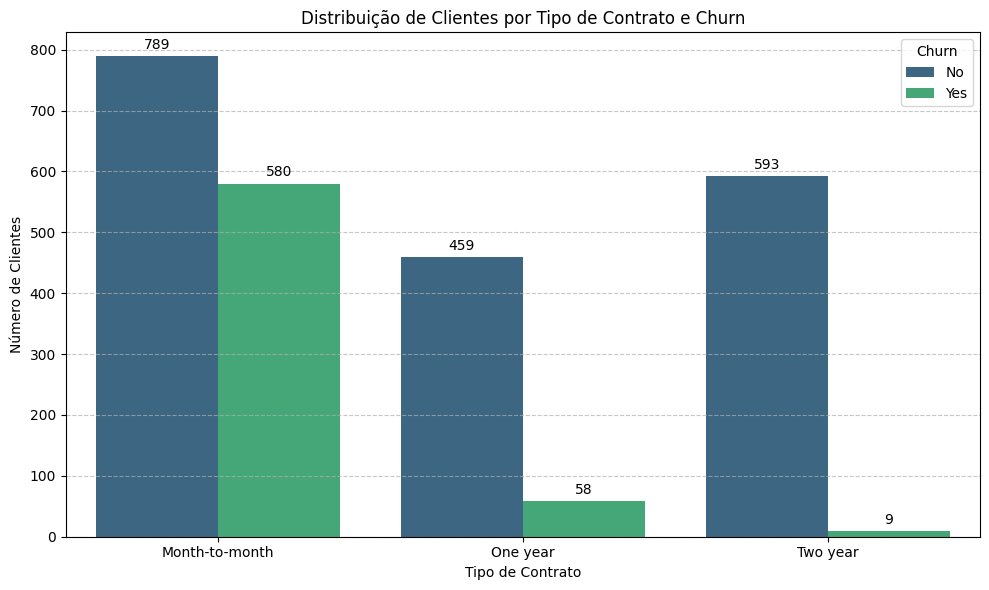

In [36]:
# Plotando o gráfico de Tipo_Contrato vs Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Tipo_Contrato', hue='Churn', palette='viridis')
plt.title('Distribuição de Clientes por Tipo de Contrato e Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos com os números
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


A maioria dos clientes tem um contrato "Month-to-month" (mês a mês).

A taxa de Churn é significativamente maior para clientes com contrato mês a mês. Isso confirma nossa suspeita inicial. Contratos mais longos, como os de "One year" (um ano) e "Two year" (dois anos), têm uma taxa de evasão muito menor.

Isso sugere que a fidelidade do cliente está diretamente ligada à duração do contrato. A empresa pode focar em estratégias para incentivar contratos de maior prazo, como oferecer descontos ou benefícios exclusivos.

/tmp/ipython-input-2454113518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Churn', y='Pagamento_Mensal', palette='viridis')


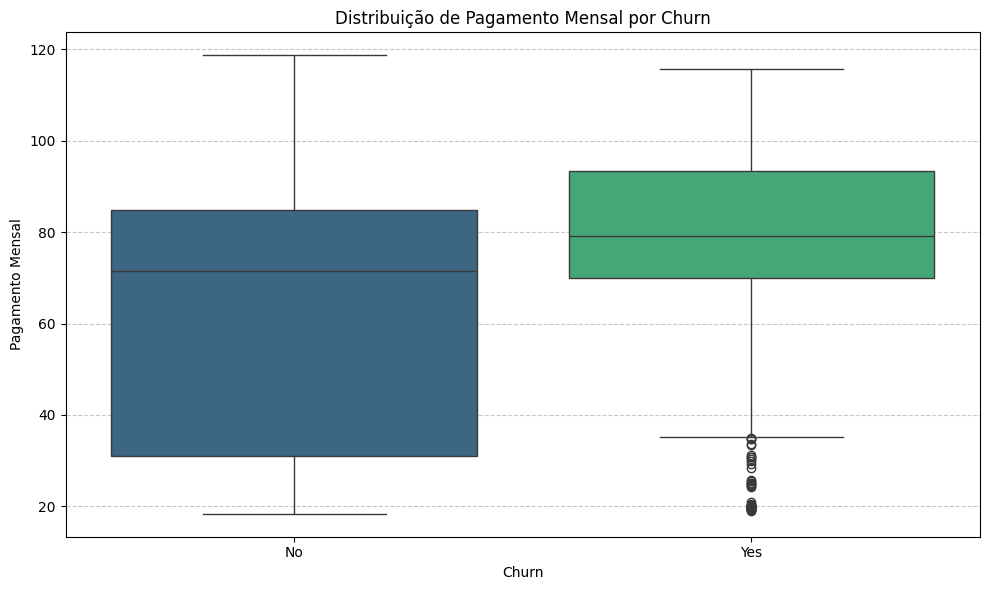

In [37]:
# Plotando o boxplot de Pagamento_Mensal vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Churn', y='Pagamento_Mensal', palette='viridis')
plt.title('Distribuição de Pagamento Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Pagamento Mensal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A mediana do Pagamento_Mensal é mais alta para os clientes que deram Churn (sim).

O gráfico também mostra que os clientes que saíram (Churn = Sim) estão concentrados em uma faixa de valores mais elevada, principalmente no quartil superior.

Isso sugere que clientes com planos mais caros ou serviços mais completos podem estar mais insatisfeitos e, portanto, mais propensos a sair. Isso é um ponto crítico que a empresa precisa investigar.

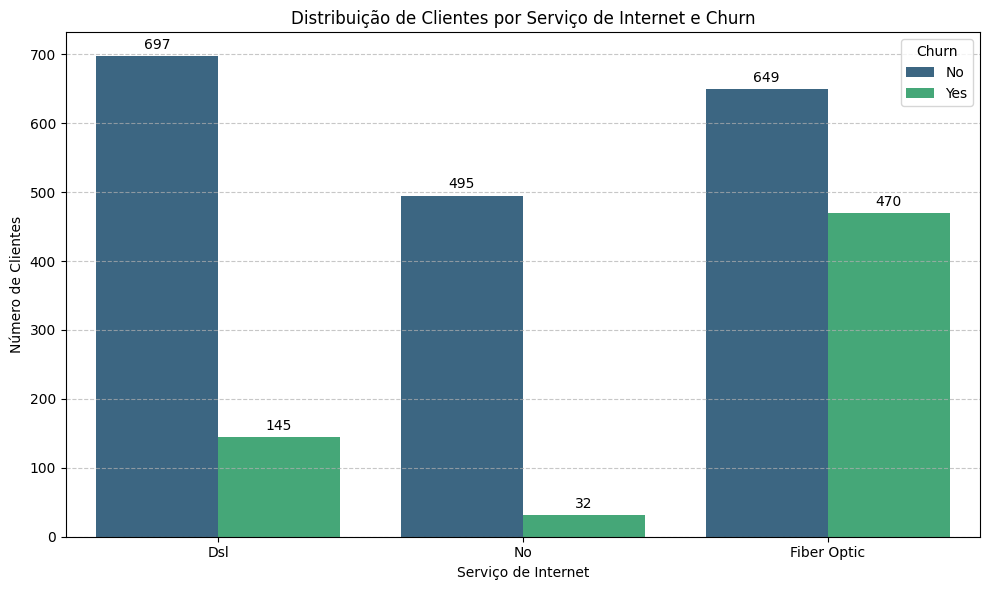

In [38]:
# Plotando o gráfico de Serviço_Internet vs Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Servico_Internet', hue='Churn', palette='viridis')
plt.title('Distribuição de Clientes por Serviço de Internet e Churn')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos com os números
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Clientes com Fibra Ótica têm uma taxa de Churn muito superior. Embora a base de clientes de fibra seja grande, a proporção de evasão nesse grupo é alarmante.

Clientes que não têm serviço de internet ou usam DSL têm uma taxa de Churn bem menor.

Esse é um dos insights mais importantes: a insatisfação parece ser mais forte entre os clientes que usam o serviço de internet mais avançado da empresa. É fundamental investigar a qualidade, a estabilidade e o suporte técnico desse serviço.

/tmp/ipython-input-938682489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Churn', y='Total_Pago', palette='viridis')


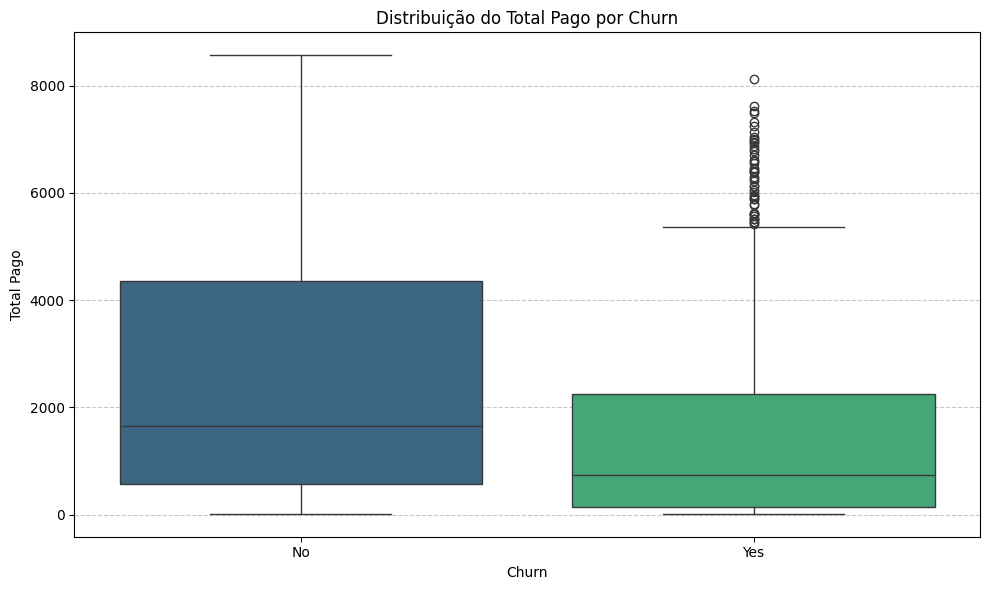

In [39]:
# Plotando o boxplot de Total_Pago vs Churn
df_cleaned['Total_Pago'] = pd.to_numeric(df_cleaned['Total_Pago'], errors='coerce')
df_cleaned.dropna(subset=['Total_Pago'], inplace=True)



plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Churn', y='Total_Pago', palette='viridis')
plt.title('Distribuição do Total Pago por Churn')
plt.xlabel('Churn')
plt.ylabel('Total Pago')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A mediana do Total_Pago é visivelmente menor para os clientes que deram Churn (sim) em comparação com os que permaneceram (não).

Isso sugere que clientes que saíram da empresa tendem a ser clientes mais recentes ou que gastaram menos dinheiro ao longo do tempo.

A presença de outliers nos clientes que não deram Churn reforça que os clientes mais antigos ou que gastaram mais tendem a permanecer fiéis à empresa.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


Em vez de simplesmente remover ou substituir os outliers, a melhor abordagem é mantê-los e transformá-los. A remoção de outliers pode levar à perda de informações valiosas, já que um cliente que pagou muito ao longo do tempo (alto Total_Pago) pode ser um cliente de longa data e, portanto, um perfil de baixo risco para churn.

Para garantir que esses valores atípicos não distorçam a análise ou um futuro modelo preditivo, a técnica mais apropriada é o escalonamento. O escalonamento reduz a dispersão dos dados e os coloca em uma mesma escala, o que é fundamental para a maioria dos modelos de Machine Learning.

O método escolhido é a transformação logarítmica. Esta técnica é particularmente eficaz para variáveis com distribuições muito assimétricas, como a Total_Pago, pois comprime a escala dos valores mais altos, reduzindo o impacto dos outliers sem eliminá-los.

/tmp/ipython-input-2672930543.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, y='Total_Pago', ax=axes[0], palette='viridis')


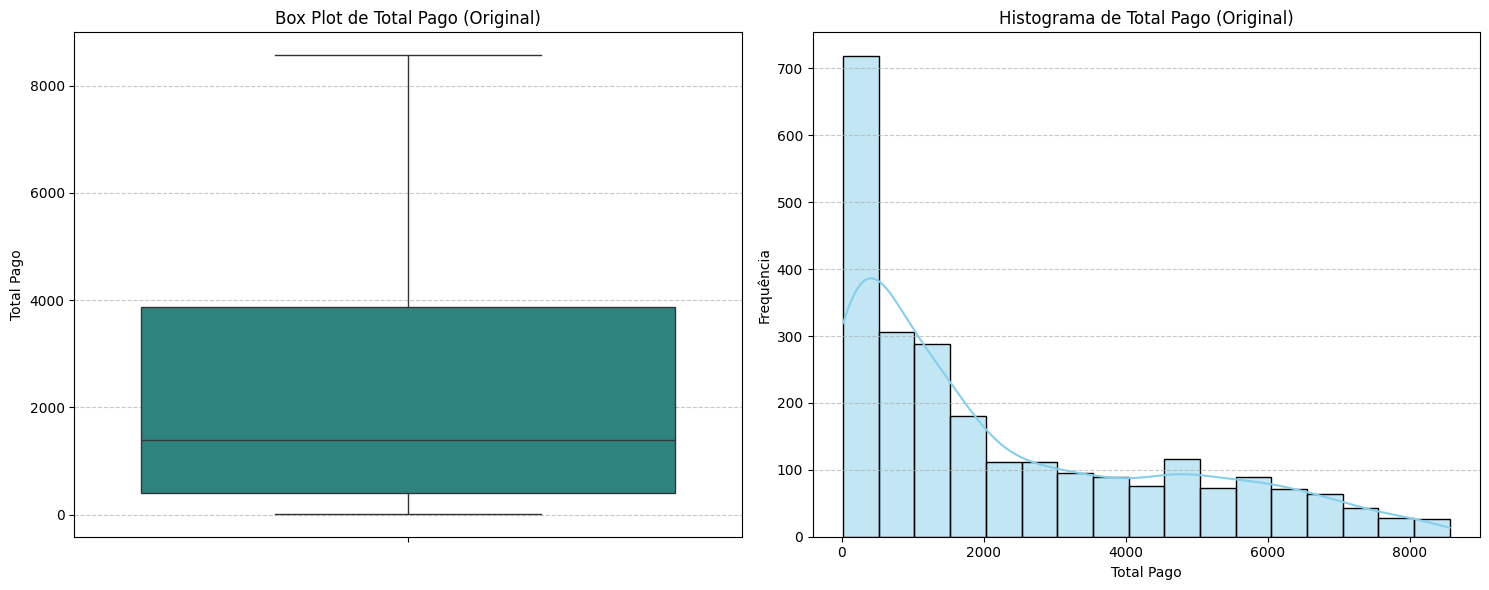

In [44]:
# 1. Plotando a distribuição de 'Total_Pago' antes da transformação
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
sns.boxplot(data=df_cleaned, y='Total_Pago', ax=axes[0], palette='viridis')
axes[0].set_title('Box Plot de Total Pago (Original)')
axes[0].set_ylabel('Total Pago')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma
sns.histplot(df_cleaned['Total_Pago'], kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Histograma de Total Pago (Original)')
axes[1].set_xlabel('Total Pago')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1534337474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, y='Total_Pago_Log', ax=axes[0], palette='plasma')


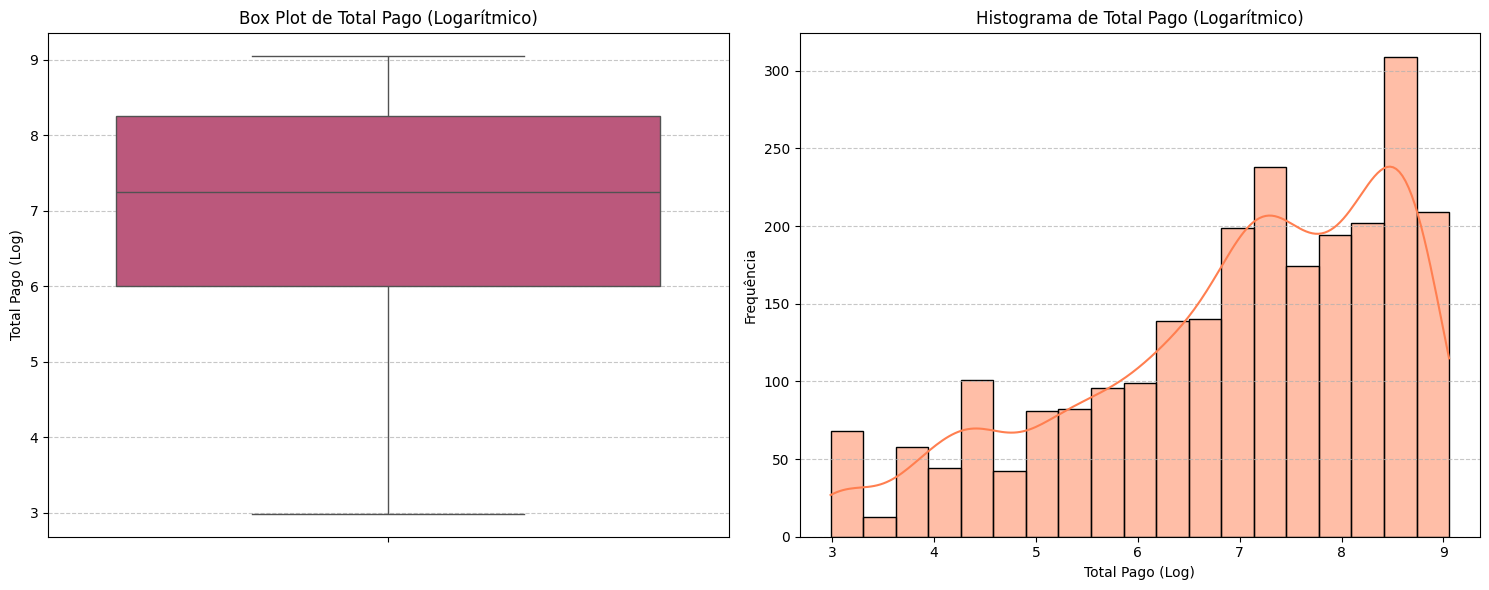

In [45]:
# 2. Aplicando a transformação logarítmica
df_cleaned['Total_Pago_Log'] = np.log1p(df['Total_Pago'])

# 3. Plotando a distribuição de 'Total_Pago' após a transformação
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
sns.boxplot(data=df_cleaned, y='Total_Pago_Log', ax=axes[0], palette='plasma')
axes[0].set_title('Box Plot de Total Pago (Logarítmico)')
axes[0].set_ylabel('Total Pago (Log)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma
sns.histplot(df_cleaned['Total_Pago_Log'], kde=True, ax=axes[1], color='coral')
axes[1].set_title('Histograma de Total Pago (Logarítmico)')
axes[1].set_xlabel('Total Pago (Log)')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

1. O gênero do cliente influencia a evasão?

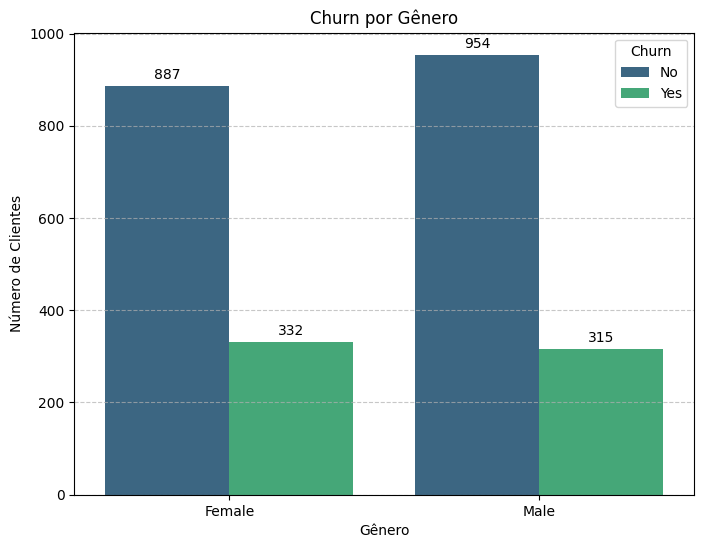

In [46]:
# Plotando o gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='Genero', hue='Churn', palette='viridis')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos com os números
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()

O gênero não parece ser um fator preditivo significativo para a evasão de clientes. Isso sugere que as estratégias de retenção não precisam ser diferenciadas por gênero.


2. Clientes com dependentes ou casados têm menor probabilidade de evasão?

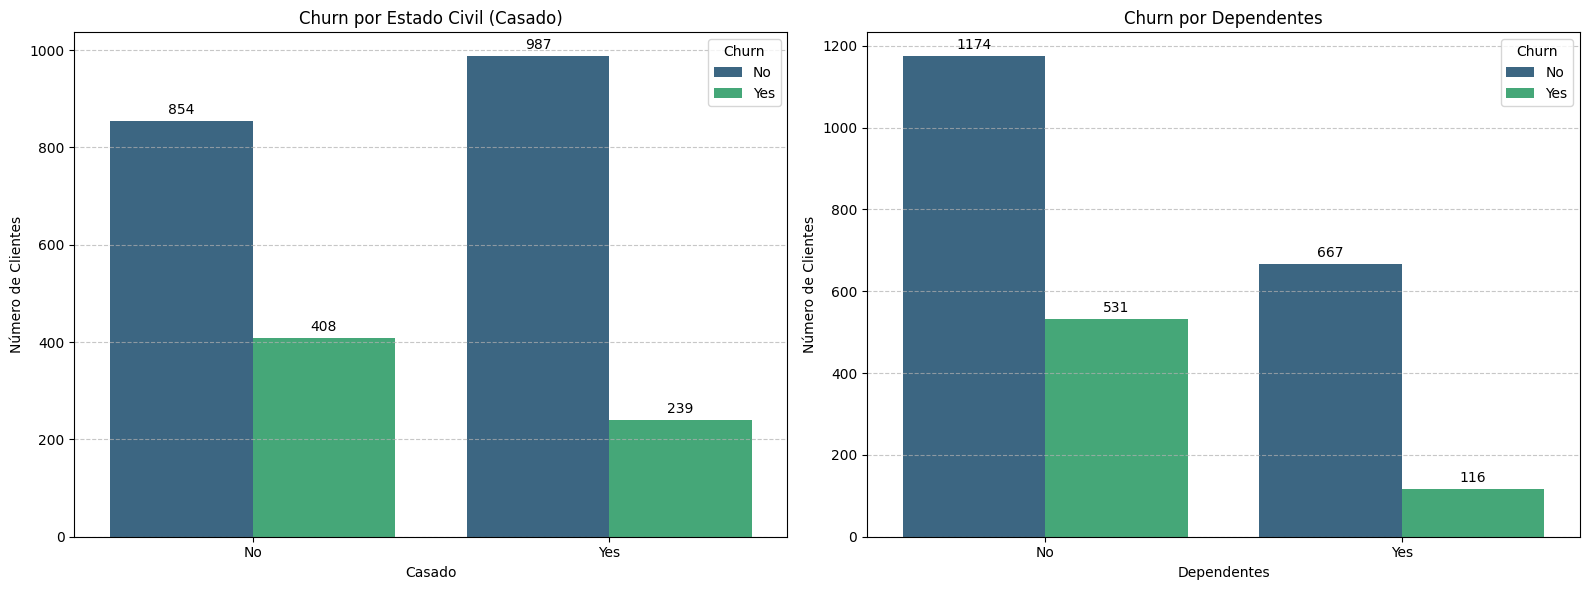

In [47]:
# Plotando Casado vs Churn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df_cleaned, x='Casado', hue='Churn', palette='viridis', ax=ax1)
ax1.set_title('Churn por Estado Civil (Casado)')
ax1.set_xlabel('Casado')
ax1.set_ylabel('Número de Clientes')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)


# Plotando Dependents vs Churn
sns.countplot(data=df_cleaned, x='Dependents', hue='Churn', palette='viridis', ax=ax2)
ax2.set_title('Churn por Dependentes')
ax2.set_xlabel('Dependentes')
ax2.set_ylabel('Número de Clientes')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

 Ter uma família, seja por ser casado ou ter dependentes, parece estar associado a uma maior estabilidade e menor probabilidade de evasão. Isso pode ser um indicativo de que esse grupo de clientes busca mais estabilidade em seus serviços



 3. Idosos têm maior probabilidade de Churn?

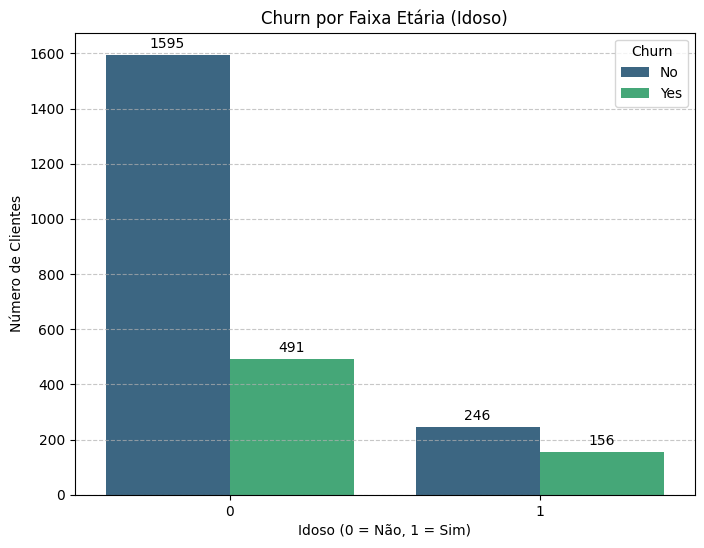

In [48]:
# Plotando Idoso vs Churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='Idoso', hue='Churn', palette='viridis')
plt.title('Churn por Faixa Etária (Idoso)')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()

A taxa de evasão é desproporcionalmente maior entre os clientes idosos. Isso sugere que a empresa pode ter problemas para atender a esse público, seja por questões de acessibilidade, suporte técnico ou adequação dos planos. É um segmento que merece atenção especial.



4. Existe uma relação entre o tempo de permanência do cliente e o Churn?

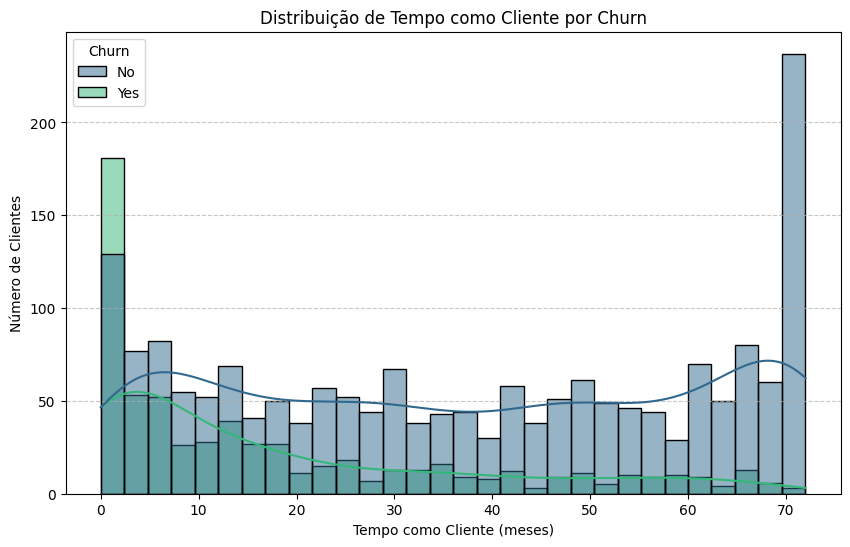

In [49]:
# Plotando o histograma de Tempo_como_Cliente vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Tempo_como_Cliente', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title('Distribuição de Tempo como Cliente por Churn')
plt.xlabel('Tempo como Cliente (meses)')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A fase inicial da jornada do cliente (os primeiros meses) é crítica e é onde a empresa perde a maioria dos clientes. Isso pode ser por uma experiência de integração ruim, problemas no serviço logo no início ou falha em corresponder às expectativas.


5. O método de pagamento está relacionado ao Churn?

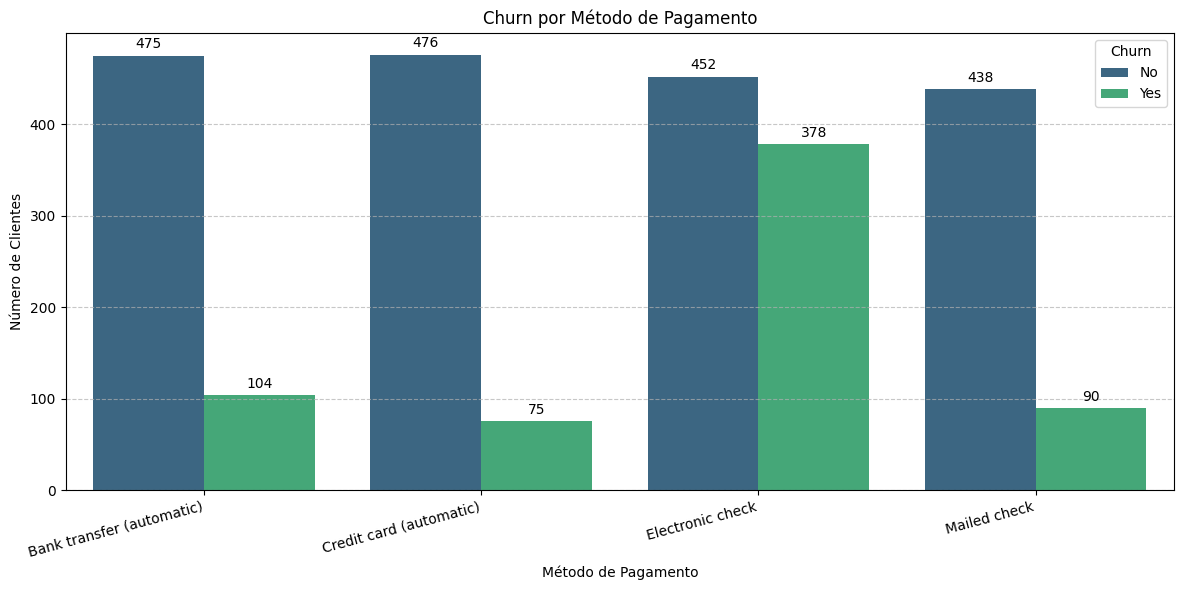

In [50]:
# Plotando o gráfico de PaymentMethod vs Churn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_cleaned, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

O método de pagamento eletrônico pode estar associado a uma experiência mais complexa ou com falhas, que levam à insatisfação e, consequentemente, à evasão. Este é um ponto de atenção importante para a empresa.





B. Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

1. Tipo_Contrato: A análise mostrou uma forte correlação entre o tipo de contrato e o Churn. Clientes com contratos de curto prazo ("Month-to-month") têm uma taxa de evasão muito maior.

2. Tempo_como_Cliente: O tempo de permanência do cliente é um dos melhores indicadores de Churn. O gráfico de distribuição mostrou claramente que a maioria dos clientes que saem da empresa o fazem nos primeiros meses.

3. Servico_Internet: A análise bivariada revelou que clientes com o serviço de Fibra Ótica têm uma taxa de Churn desproporcionalmente alta.

4. Total_Pago e Pagamento_Mensal: Juntas, essas variáveis financeiras dão um panorama do valor do cliente. O Total_Pago indicou que clientes que gastaram menos tendem a sair, enquanto o Pagamento_Mensal mostrou que clientes com contas mais caras também estão mais propensos a dar Churn.

5. Suporte_Tecnico e Servico_Seguranca: Embora não tenhamos plotado gráficos para todos os serviços, a natureza dessas variáveis é diretamente ligada à satisfação do cliente. Um cliente que não tem suporte técnico ou serviço de segurança pode se sentir desamparado e, por isso, estar mais propenso à evasão.

Essas variáveis, em conjunto, formam o núcleo da análise preditiva de Churn. Ao construir um modelo, a combinação desses atributos nos dará o maior poder de previsão.